# NLP Challenge: IMDB Dataset of 50K Movie Reviews

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import os
import shutil
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization
import tensorflow as tf
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, confusion_matrix

In [3]:
# CD into project dir
%cd /content/drive/MyDrive/Colab_Notebooks/FellowshipAI_Challenge

project_dir = os.getcwd()

/content/drive/MyDrive/Colab_Notebooks/FellowshipAI_Challenge


In [4]:
## Download Dataset
# import kagglehub

# path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# print(f'Path to Dataset files: {path}')

In [5]:
## Move Dataset to Drive (From Colab Runtime)
# shutil.move('/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1', '/content/drive/MyDrive/Colab_Notebooks/FellowshipAI_Challenge/Data')

In [6]:
## Read in Data in csv format
data = pd.read_csv('Data/1/IMDB Dataset.csv')

In [7]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


The Dataset would be divided into two sets, the training and the test sets, each containing 25k samples, as mentioned, in the dataset desciption.

## Data Visualization

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


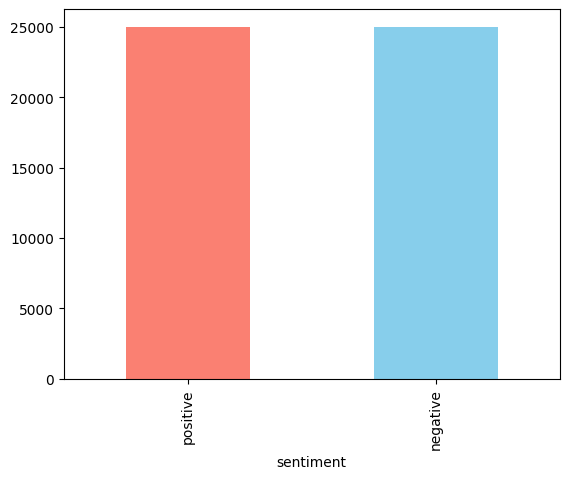

In [ ]:
data.sentiment.value_counts().plot(kind='bar', color=['salmon', 'skyblue']);

In [ ]:
data['review_len'] = data['review'].apply(lambda x: len(str(x)))
data['word_count'] = data['review'].apply(lambda x: len(x.split()))

In [ ]:
data

,review,sentiment,review_len,word_count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112
49997,I am a Catholic taught in parochial elementary...,negative,1280,230
49998,I'm going to have to disagree with the previou...,negative,1234,212


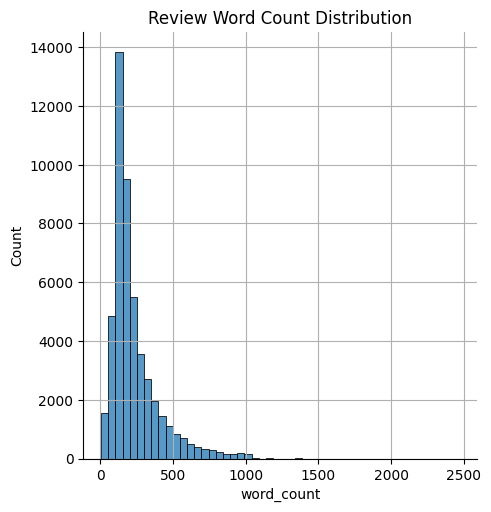

In [ ]:
sns.displot(data['word_count'], bins=50)
plt.title('Review Word Count Distribution');
plt.grid(True)
plt.show()

Most of the reviews, have text lenght between 100 to 400

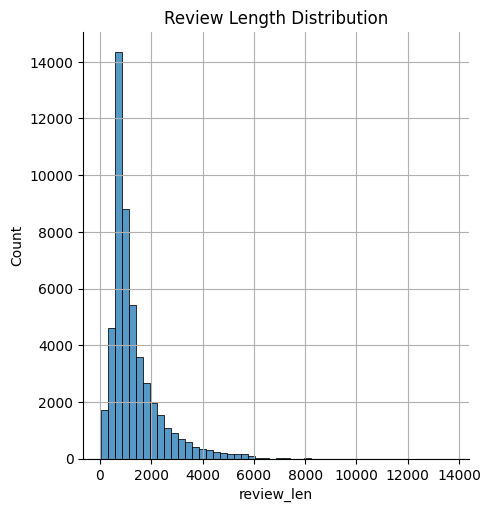

In [ ]:
sns.displot(data['review_len'], bins=50);
plt.title('Review Length Distribution');
plt.grid(True);
plt.show()

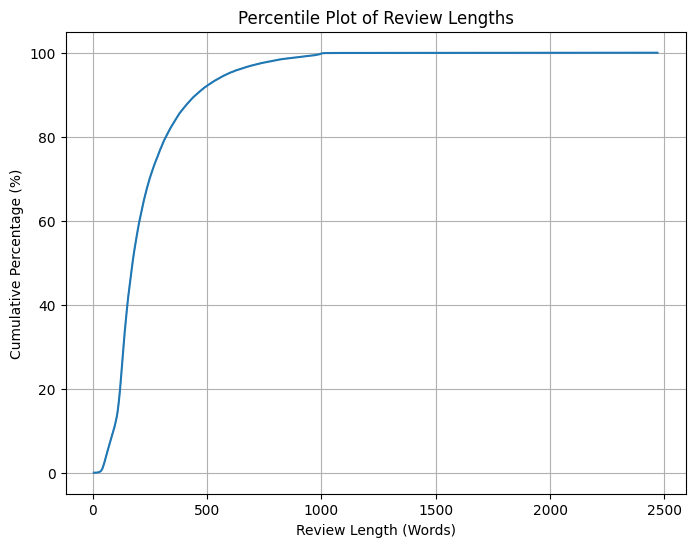

In [ ]:
sorted_lengths = np.sort(data['word_count'])

# Calculate cumulative percentage
cumulative_percent = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths) * 100

# Plot the CDF (Percentile plot)
plt.figure(figsize=(8, 6))
sns.lineplot(x=sorted_lengths, y=cumulative_percent)
plt.title('Percentile Plot of Review Lengths')
plt.xlabel('Review Length (Words)')
plt.ylabel('Cumulative Percentage (%)')
plt.grid(True)
plt.show()

In [ ]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
  vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
  bag_of_words = vec.transform(corpus)

  sum_words = bag_of_words.sum(axis=0)

  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

  common_words = words_freq[:n]
  words = []
  freqs = []
  for word, freq in common_words:
    words.append(word)
    freqs.append(freq)

  df = pd.DataFrame({'Word': words, 'Freq':freqs})
  return df

In [ ]:
stopWords = None
n = 20
unigrams = get_top_ngrams(data.review, (1, 1), stop_words=stopWords, n=20)
bigrams = get_top_ngrams(data.review, (2, 2), stop_words=stopWords, n=20)
trigrams = get_top_ngrams(data.review, (3, 3), stop_words=stopWords, n=20)

In [ ]:
stopWords = 'english'
n = 20
unigrams_st = get_top_ngrams(data.review, (1, 1), stop_words=stopWords, n=20)
bigrams_st= get_top_ngrams(data.review, (2, 2), stop_words=stopWords, n=20)
trigrams_st = get_top_ngrams(data.review, (3, 3), stop_words=stopWords, n=20)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 8))
fig.tight_layout(pad=5.0);

# Plot top 20 Unigrams
sns.barplot(data=unigrams, ax=ax[0], x='Freq', y='Word', palette='Blues_r', hue='Word');
ax[0].set_title('Top 20 Unigrams (Before Removing Stopwords)');
ax[0].grid(True);

# Plot top 20 Bigrams
sns.barplot(data=unigrams_st, ax=ax[1], x='Freq', y='Word', palette='Reds_r', hue='Word');
ax[1].set_title('Top 20 Unigrams (After Removing Stopwords)');
ax[1].grid(True);

plt.show();

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 8))
fig.tight_layout(pad=5.0);

# Plot top 20 Unigrams
sns.barplot(data=bigrams, ax=ax[0], x='Freq', y='Word', palette='Blues_r', hue='Word');
ax[0].set_title('Top 20 Bigrams (Before Removing Stopwords)');
ax[0].grid(True);

# Plot top 20 Bigrams
sns.barplot(data=bigrams_st, ax=ax[1], x='Freq', y='Word', palette='Reds_r', hue='Word');
ax[1].set_title('Top 20 Bigrams (After Removing Stopwords)');
ax[1].grid(True);

plt.show();

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 8))
fig.tight_layout(pad=5.0);

# Plot top 20 Unigrams
sns.barplot(data=trigrams, ax=ax[0], x='Freq', y='Word', palette='Blues_r', hue='Word');
ax[0].set_title('Top 20 Trigrams (Before Removing Stopwords)');
ax[0].grid(True);

# Plot top 20 Bigrams
sns.barplot(data=trigrams_st, ax=ax[1], x='Freq', y='Word', palette='Reds_r', hue='Word');
ax[1].set_title('Top 20 Trigrams (After Removing Stopwords)');
ax[1].grid(True);

plt.show();

Notice the 'br' which is not an english word, this would have to be removed during the preprocessing stage.

In [ ]:
# Plot Word Cloud
!pip install wordcloud

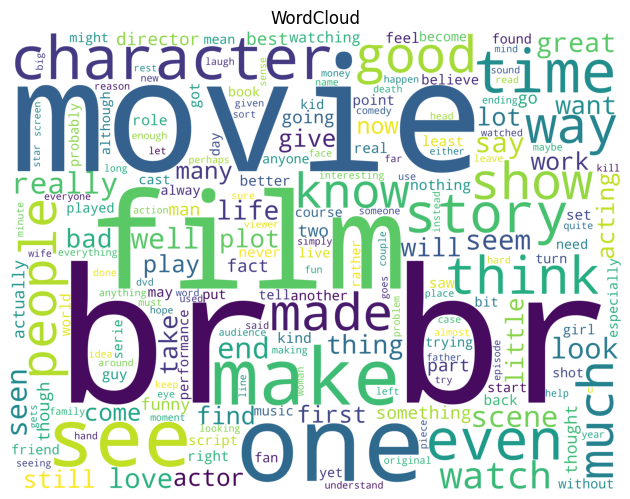

In [ ]:
from wordcloud import WordCloud, STOPWORDS

review_words = " "
stopwords_set = set(STOPWORDS)

for review  in data.review:
  review = str(review)
  # print(f'Review: {review}')
  tokens = review.split()
  # print(f'tokens: {tokens}')
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  # print(f'tokens: {tokens}')
  review_words += ' '.join(tokens)+" "
  # print(f'review_words {review_words} \n')

wordcloud = WordCloud(width=4000, height=3000, background_color='white', stopwords=stopwords_set, min_font_size=10).generate(review_words)

plt.figure()
plt.imshow(wordcloud)
plt.title('WordCloud')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Data Preprocessing

- Remove non-english words (Special Characters, Punctuations)
- Tokenization
- Remove Stop Words
- Remove HTML TAGS(<code>br</code>), URLs, etc
- Lemmatization
- Text Vectorization

In [8]:
data = pd.read_csv(project_dir + '/Data/1/IMDB Dataset.csv')

In [9]:
text = data['review']
labels = data['sentiment']

In [10]:
class Preprocess():
  def __init__(self, text):
    self.text = text

  def remove_puntuations(self):
    self.text = self.text.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    return self

  def remove_stopwords(self):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    self.text = self.text.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    return self

  def remove_tags_and_urls(self):
    self.text = self.text.apply(lambda x: re.sub(r'<[^>]+>.*?</[^>]+>', '', x))
    self.text = self.text.apply(lambda x: re.sub(r'http[s]?://\S+|www\.\S+', '', x))
    return self

  def lemmatization(self):
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    self.text = self.text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    return self

  def preprocess(self):
    self.remove_puntuations().remove_stopwords().remove_tags_and_urls().lemmatization()
    return self.text

  @staticmethod
  def numerically_convert_labels(labels):
    return labels.map({'positive': int(1), 'negative': int(0)})

In [11]:
data_cleaned = data.copy()

In [12]:
data_cleaned.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
data_cleaned['review'] = Preprocess(text).preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
data_cleaned

,review,sentiment
0,One reviewer mentioned watching 1 Oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there family little boy Jake think t...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,Catholic taught parochial elementary school nu...,negative
49998,Im going disagree previous comment side Maltin...,negative


In [15]:
data_cleaned['sentiment'] = Preprocess.numerically_convert_labels(data['sentiment'])

In [16]:
data_cleaned

,review,sentiment
0,One reviewer mentioned watching 1 Oz episode y...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically there family little boy Jake think t...,0
4,Petter Matteis Love Time Money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,Bad plot bad dialogue bad acting idiotic direc...,0
49997,Catholic taught parochial elementary school nu...,0
49998,Im going disagree previous comment side Maltin...,0


In [17]:
## Shuffle Dataset
data_shuffled = data_cleaned.sample(frac=1, random_state=42)

In [18]:
data_shuffled.head(3)

,review,sentiment
33553,really liked Summerslam due look arena curtain...,1
9427,many television show appeal quite many differe...,1
199,film quickly get major chase scene ever increa...,0


In [19]:
## Seperate Features from Labels
texts = data_shuffled['review']
labels = data_shuffled['sentiment']

## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, random_state=42, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000,), (10000,), (40000,), (10000,))

In [21]:
text_vectorization = TextVectorization(max_tokens=1000,
                                       output_sequence_length=400,
                                       output_mode='int')

text_vectorization.adapt(X_train)

In [22]:
## Create Validation Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((32000,), (8000,), (32000,), (8000,))

## Modelling

In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [27]:
for batch in train_dataset.take(1):
    print(batch)

(<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'dubbed another language Lets face Neither Nielsen Schwarzenegger really good actor come dialog given campy line supposed utter looseloose situation type voiceover sure improvement actually least German versionbr br minor point acting bad speeded combat sequence pathetic Nielsen couldnt use sword fight way wet paper bag becomes painfully obvious compared fluidity motion exhibited kid martial art training doubt athleticism shown Sandahl Bergmanbr br Schwarzenegger Conan thing nothing new herebr br visuals nice Ill grant dragon skeleton bridge look cool often plaster evidentbr br Overall movie isnt worth seeing Even Conan Destroyer better although marginally would much rather seen Bergman Red Sonja originally supposed doubt could saved movie oh wellbr br 310',
       b'caught first screening Driving Lessons Tribeca Film Festival Rupert Grint show act past Harry Potter Laura Linney amazing overbearing mother Julie Walters hilarious Da

### **DNN**

In [29]:
BATCH_SIZE = 32
EPOCH = 50
LEARNING_RATE = 0.001 * tf.sqrt(BATCH_SIZE/256)

In [32]:
input_layer = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
vectorizer = text_vectorization(input_layer)
embedding_layer = tf.keras.layers.Embedding(input_dim=1000, output_dim=128)(vectorizer)
x = tf.keras.layers.GlobalAveragePooling1D()(embedding_layer)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='Ouput_Layer')(x)
model = tf.keras.Model(input_layer, output_layer)

model.summary()

model_ckpt = tf.keras.callbacks.ModelCheckpoint(filepath=project_dir+'/Outputs/model_1.keras', monitor='val_loss', save_best_only=True, verbose=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, decay_steps=1000, decay_rate=0.9)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=reduce_lr),
              metrics=['accuracy'])

model_history = model.fit(train_dataset,
                          epochs=50,
                          batch_size=32,
                          #steps_per_epoch=len(train_dataset)//BATCH_SIZE,
                          validation_data= val_dataset,
                          #validation_steps=len(val_dataset)//BATCH_SIZE,
                          callbacks=[model_ckpt, earlystopping])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 400)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 400, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Ouput_Layer (Dense)                  │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,833 (597.00 KB)

 Trainable params: 152,833 (597.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
 994/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5464 - loss: 0.6737
Epoch 1: val_loss improved from inf to 0.41807, saving model to /content/drive/MyDrive/Colab_Notebooks/FellowshipAI_Challenge/Outputs/model_1.keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5470 - loss: 0.6733 - val_accuracy: 0.8298 - val_loss: 0.4181
Epoch 2/50
 993/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8056 - loss: 0.4249
Epoch 2: val_loss improved from 0.41807 to 0.36680, saving model to /content/drive/MyDrive/Colab_Notebooks/FellowshipAI_Challenge/Outputs/model_1.keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8057 - loss: 0.4248 - val_accuracy: 0.8407 - val_loss: 0.3668
Epoch 3/50
 996/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8349 - loss: 0.3703
Epoch 3: val_loss improved from 0.36680 to 0.34690, saving model to /content/drive/MyDrive/Colab_Notebooks/FellowshipAI_Challenge/Outputs/model_1.keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - a

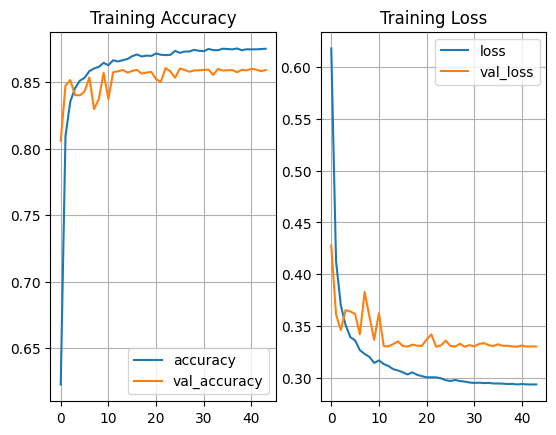

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('Training Accuracy')
ax[0].plot(model_history.epoch, model_history.history['accuracy'], label='accuracy')
ax[0].plot(model_history.epoch, model_history.history['val_accuracy'], label='val_accuracy')
ax[0].grid(True)
ax[0].legend()
ax[1].set_title('Training Loss')
ax[1].plot(model_history.epoch, model_history.history['loss'], label='loss')
ax[1].plot(model_history.epoch, model_history.history['val_loss'], label='val_loss')
ax[1].grid(True)
ax[1].legend()

#### DNN Evaluation

In [35]:
loaded_dnn = tf.keras.models.load_model(project_dir + '/Outputs/model_1.keras')

In [36]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [37]:
loaded_dnn.evaluate(train_dataset)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8753 - loss: 0.2935


[0.2939365804195404, 0.8747187256813049]

In [38]:
loaded_dnn.evaluate(test_dataset)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8676 - loss: 0.3146


[0.3156217336654663, 0.8641999959945679]

In [39]:
y_preds = loaded_dnn.predict(test_dataset)
y_preds = tf.cast(tf.round(tf.squeeze(y_preds)), dtype=tf.int32)
y_preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<tf.Tensor: shape=(10000,), dtype=int32, numpy=array([0, 1, 1, ..., 0, 0, 0], dtype=int32)>

In [40]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4951
           1       0.86      0.87      0.87      5049

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



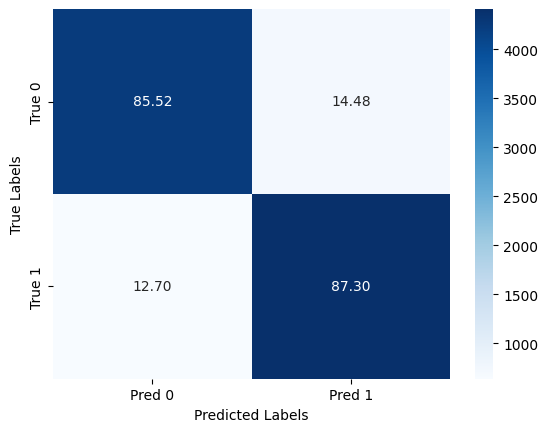

In [41]:
conf_mat = confusion_matrix(y_test, y_preds)
annots = conf_mat.astype(float) / conf_mat.sum(axis=1)[:, np.newaxis] * 100
plt.figure()
sns.heatmap(conf_mat, annot=annots, fmt='.2f', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels');
plt.ylabel('True Labels');
plt.show()

### **LSTM**

In [42]:
BATCH_SIZE = 32
EPOCH = 50
LEARNING_RATE = 0.001 * tf.sqrt(BATCH_SIZE/256)

In [44]:
input_layer = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
vectorizer = text_vectorization(input_layer)
embedding_layer = tf.keras.layers.Embedding(input_dim=1000, output_dim=128)(vectorizer)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=256, activation='tanh', return_sequences=True))(embedding_layer)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=False))(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(x)
lstm_model = tf.keras.Model(input_layer, output_layer)

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
model_ckpt = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='Outputs/Model_2(lstm).keras', save_best_only=True, verbose=True)
reduce_lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, decay_rate=0.9, decay_steps=1000)

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=reduce_lr),
                   metrics=['accuracy'])

lstm_model_history = lstm_model.fit(train_dataset,
                                    epochs=EPOCH,
                                    batch_size=BATCH_SIZE,
                                    validation_data=val_dataset,
                                    #steps_per_epoch=len(train_dataset)//BATCH_SIZE,
                                    #validation_steps = len(val_dataset)//BATCH_SIZE,
                                    callbacks=[earlystopping_callback, model_ckpt])

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6627 - loss: 0.5963
Epoch 1: val_loss improved from inf to 0.56822, saving model to Outputs/Model_2(lstm).keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 125s 121ms/step - accuracy: 0.6628 - loss: 0.5963 - val_accuracy: 0.7216 - val_loss: 0.5682
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7872 - loss: 0.4634
Epoch 2: val_loss improved from 0.56822 to 0.38873, saving model to Outputs/Model_2(lstm).keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 120s 120ms/step - accuracy: 0.7872 - loss: 0.4634 - val_accuracy: 0.8288 - val_loss: 0.3887
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8405 - loss: 0.3683
Epoch 3: val_loss improved from 0.38873 to 0.34917, saving model to Outputs/Model_2(lstm).keras
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 120ms/step - accuracy: 0.8405 - loss: 0.3683 - val_accuracy: 0.8466 - val_loss: 0.3492
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8517 - 

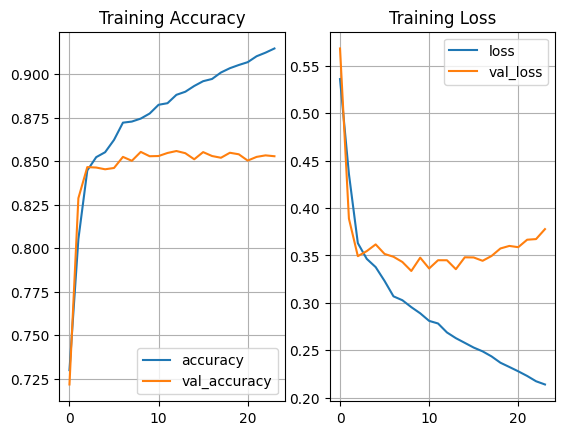

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('Training Accuracy')
ax[0].plot(lstm_model_history.epoch, lstm_model_history.history['accuracy'], label='accuracy')
ax[0].plot(lstm_model_history.epoch, lstm_model_history.history['val_accuracy'], label='val_accuracy')
ax[0].grid(True)
ax[0].legend()
ax[1].set_title('Training Loss')
ax[1].plot(lstm_model_history.epoch, lstm_model_history.history['loss'], label='loss')
ax[1].plot(lstm_model_history.epoch, lstm_model_history.history['val_loss'], label='val_loss')
ax[1].grid(True)
ax[1].legend()

#### LSTM Evaluation

In [46]:
loaded_lstm_model = tf.keras.models.load_model('Outputs/Model_2(lstm).keras')

In [47]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [48]:
loaded_lstm_model.evaluate(train_dataset)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 65s 61ms/step - accuracy: 0.8864 - loss: 0.2770


[0.27977392077445984, 0.8841249942779541]

In [49]:
loaded_lstm_model.evaluate(test_dataset)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8610 - loss: 0.3231


[0.32579663395881653, 0.8587999939918518]

In [50]:
y_pred = tf.cast(tf.round(tf.squeeze(loaded_lstm_model.predict(X_test))), dtype=tf.int32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4951
           1       0.85      0.88      0.86      5049

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Text(50.722222222222214, 0.5, 'Actual Values')

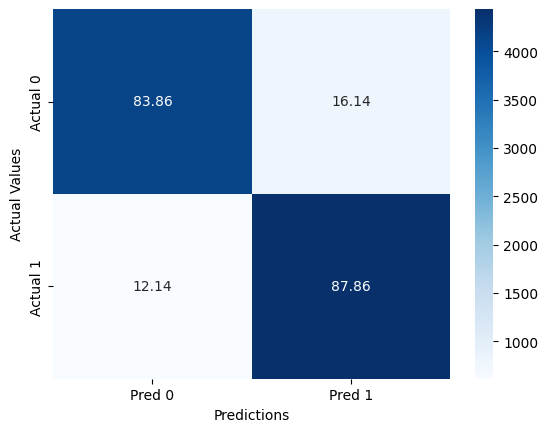

In [52]:
conf_mat = confusion_matrix(y_test, y_pred)
percentage_annots = conf_mat.astype(float) / conf_mat.sum(axis=1)[:, np.newaxis] * 100
plt.figure()
sns.heatmap(conf_mat, annot=percentage_annots, fmt='.2f', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predictions')
plt.ylabel('Actual Values')

### **CNN**

In [28]:
BATCH_SIZE = 32
LEARNING_RATE=0.001 * tf.math.sqrt(BATCH_SIZE/256)
EPOCHS = 50

In [ ]:
input_layer = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
vectorizer_layer = text_vectorization(input_layer)
embedding_layer = tf.keras.layers.Embedding(input_dim=1000, output_dim=128)(vectorizer_layer)
x = tf.keras.layers.Conv1D(filters=64,
                           kernel_size=3,
                           strides=2,
                           padding='same',
                           activation='relu')(embedding_layer)
x = tf.keras.layers.Conv1D(filters=128,
                           kernel_size=2,
                           strides=2,
                           padding='same',
                           activation='relu')(x)
x = tf.keras.layers.Conv1D(filters=256,
                           kernel_size=2,
                           strides=2,
                           padding='same',
                           activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(x)
cnn_model = tf.keras.Model(input_layer, output_layer)

save_model_ckpt = tf.keras.callbacks.ModelCheckpoint(filepath='Outputs/model_3(cnn).keras', monitor='val_loss', save_best_only=True, verbose=True)
earlystopping = tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss')
reduce_lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, decay_steps=1000, decay_rate=0.9)

cnn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=reduce_lr),
                  metrics=['accuracy'])

cnn_model_history = cnn_model.fit(train_dataset,
                                  epochs=EPOCHS,
                                  batch_size=BATCH_SIZE,
                                  steps_per_epoch=len(train_dataset)//BATCH_SIZE,
                                  validation_data=val_dataset,
                                  validation_steps=len(val_dataset)//BATCH_SIZE,
                                  callbacks=[save_model_ckpt, earlystopping])

Epoch 1/50
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4865 - loss: 0.6934
Epoch 1: val_loss improved from inf to 0.69123, saving model to Outputs/model_3(cnn).keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4893 - loss: 0.6933 - val_accuracy: 0.5580 - val_loss: 0.6912
Epoch 2/50
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4575 - loss: 0.6940
Epoch 2: val_loss did not improve from 0.69123
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4619 - loss: 0.6939 - val_accuracy: 0.5491 - val_loss: 0.6919
Epoch 3/50
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5075 - loss: 0.6916
Epoch 3: val_loss did not improve from 0.69123
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5073 - loss: 0.6917 - val_accuracy: 0.5804 - val_loss: 0.6924
Epoch 4/50
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5348 - loss: 0.6902
Epoch 4: val_loss improved from 0.69123 to 0.67376, saving model to Outputs/model_3(cnn).keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8629 - loss: 0.3331
Epoch 34: val_loss did not improve from 0.30624
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8619 - loss: 0.3332 - val_accuracy: 0.8750 - val_loss: 0.3179
Epoch 35/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8440 - loss: 0.3687
Epoch 35: val_loss did not improve from 0.30624
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8446 - loss: 0.3678 - val_accuracy: 0.8348 - val_loss: 0.3621
Epoch 36/50
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8733 - loss: 0.3143
Epoch 36: val_loss improved from 0.30624 to 0.30619, saving model to Outputs/model_3(cnn).keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.8734 - loss: 0.3143 - val_accuracy: 0.8750 - val_loss: 0.3062
Epoch 37/50
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8637 - loss: 0.3131
Epoch 37: val_loss did not improve from 0.30619
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8641 - loss: 0.3128 - val_

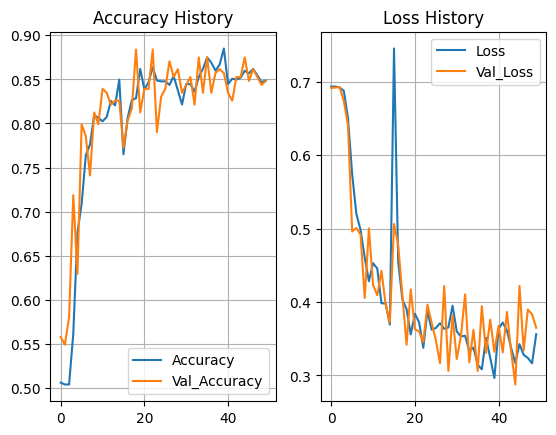

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(cnn_model_history.epoch, cnn_model_history.history['accuracy'], label='Accuracy')
ax[0].plot(cnn_model_history.epoch, cnn_model_history.history['val_accuracy'], label='Val_Accuracy')
ax[0].grid(True)
ax[0].set_title('Accuracy History')
ax[0].legend()
ax[1].plot(cnn_model_history.epoch, cnn_model_history.history['loss'], label='Loss')
ax[1].plot(cnn_model_history.epoch, cnn_model_history.history['val_loss'], label='Val_Loss')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Loss History')
plt.show()

#### CNN Model Evaluation

In [ ]:
loaded_cnn_model = tf.keras.models.load_model('Outputs/model_3(cnn).keras')

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
loaded_cnn_model.evaluate(test_dataset)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8626 - loss: 0.3395


[0.3421689569950104, 0.8585000038146973]

In [ ]:
y_preds = tf.cast(tf.round(tf.squeeze(loaded_cnn_model.predict(X_test))), dtype=tf.int32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4951
           1       0.86      0.86      0.86      5049

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Text(50.722222222222214, 0.5, 'Actual Labels')

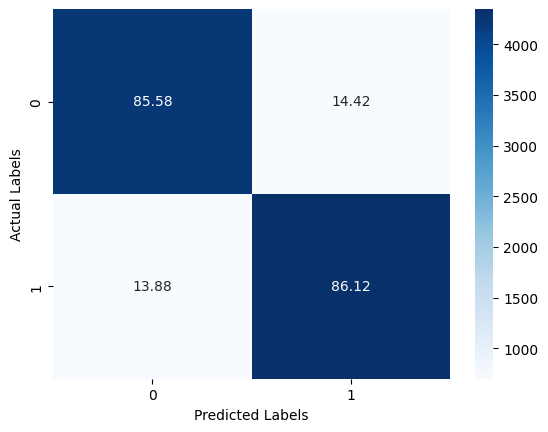

In [ ]:
conf_mat = confusion_matrix(y_test, y_preds)
plt.figure()
annots = conf_mat.astype(float) / conf_mat.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_mat, annot=annots, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

## Model Comparison

In [25]:
loaded_dnn_model = tf.keras.models.load_model('Outputs/model_1.keras')
loaded_cnn_model = tf.keras.models.load_model('Outputs/model_3(cnn).keras')
loaded_lstm_model = tf.keras.models.load_model('Outputs/Model_2(lstm).keras')

In [37]:
def compare_models(models, X_test, y_test):
  '''
  This function compare the models performance, to select which is best performing
  '''
  metrics_dict = []
  for model_name, model in models.items():
    y_pred = tf.cast(tf.round(tf.squeeze(model.predict(X_test))), dtype=tf.int32)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_metric = {model_name: {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_score': f1
    }}
    metrics_dict.append(model_metric)
  return metrics_dict

In [83]:
models = {'DNN': loaded_dnn_model,
          'CNN': loaded_cnn_model,
          'LSTM': loaded_lstm_model}

model_metrics_dict = compare_models(models, X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 535s 2s/step


In [84]:
model_metrics_dict

[{'DNN': {'Accuracy': 0.8642,
   'Precision': 0.8600975609756097,
   'Recall': 0.8730441671618142,
   'F1_score': 0.8665225083546294}},
 {'CNN': {'Accuracy': 0.8585,
   'Precision': 0.8589490320031608,
   'Recall': 0.8611606258665082,
   'F1_score': 0.8600534071802987}},
 {'LSTM': {'Accuracy': 0.8588,
   'Precision': 0.8473734479465138,
   'Recall': 0.8785898197662904,
   'F1_score': 0.8626993387786853}}]

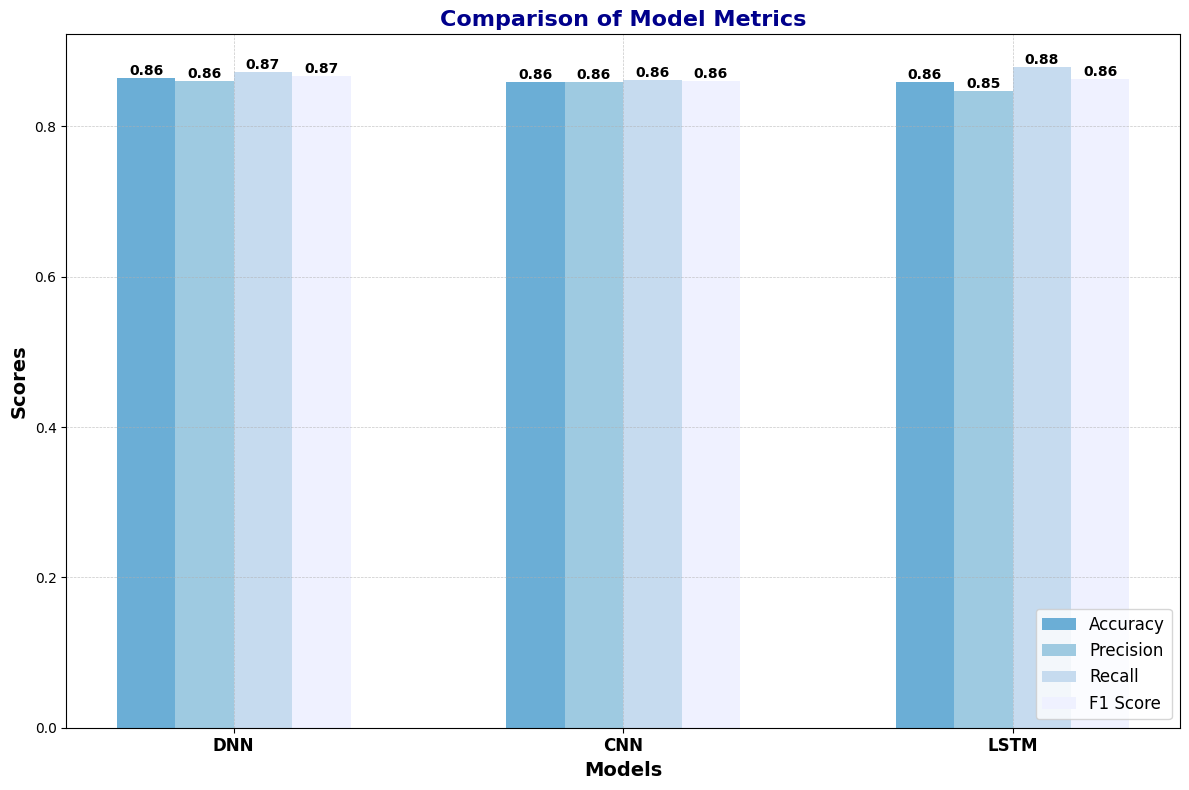

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
models = [list(metric.keys())[0] for metric in model_metrics_dict]
accuracy = [list(metric.values())[0]['Accuracy'] for metric in model_metrics_dict]
precision = [list(metric.values())[0]['Precision'] for metric in model_metrics_dict]
recall = [list(metric.values())[0]['Recall'] for metric in model_metrics_dict]
f1 = [list(metric.values())[0]['F1_score'] for metric in model_metrics_dict]

x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#6BAED6', '#9ECAE1', '#C6DBEF', '#EFF1FF']

bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color=colors[0])
bars2 = ax.bar(x - 0.5 * width, precision, width, label='Precision', color=colors[1])
bars3 = ax.bar(x + 0.5 * width, recall, width, label='Recall', color=colors[2])
bars4 = ax.bar(x + 1.5 * width, f1, width, label='F1 Score', color=colors[3])

def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

add_values(bars1)
add_values(bars2)
add_values(bars3)
add_values(bars4)

# Customize the plot
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Model Metrics', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12, fontweight='bold')
ax.legend(loc='lower right', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

Since for our use case, both precision and recall are to be prioritized, the f1score would be our main metric. And from the plot above, DNN has the highest f1 score, making it the best performing model.

## Make Prediction on DNN Model

In [86]:
loaded_dnn_model = tf.keras.models.load_model('Outputs/model_1.keras')

In [141]:
class Predict():
  def __init__(self, text):
    self.text = text

  class Preprocess():
    def __init__(self, text):
      self.text = text

    def remove_punctuations(self):
      if isinstance(self.text, pd.DataFrame):
        self.text = self.text.apply(lambda x: re.sub(r'[^\w\s]', '', x))
      else:
        self.text = re.sub(r'[^\w\s]', '', self.text)
      return self

    def remove_stopwords(self):

      nltk.download('stopwords')
      stop_words = set(stopwords.words('english'))

      if isinstance(self.text, pd.DataFrame):
        self.text = self.text.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
      else:
        self.text = ' '.join([word for word in self.text.split() if word.lower() not in stop_words])

      return self

    def remove_tags_and_urls(self):
      if isinstance(self, pd.DataFrame):
        self.text = self.text.apply(lambda x: re.sub(r'<[^>]+>.*?</[^>]+>', '', x))
        self.text = self.text.apply(lambda x: re.sub(r'http[s]?://\S+|www\.\S+', '', x))
      else:
        self.text = re.sub(r'<[^>]+>.*?</[^>]+>', '', self.text)
        self.text = re.sub(r'http[s]?://\S+|www\.\S+', '', self.text)
      return self

    def lemmatization(self):
      nltk.download('wordnet')
      lemmatizer = WordNetLemmatizer()
      if isinstance(self, pd.DataFrame):
        self.text = self.text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
      else:
        self.text = ' '.join([lemmatizer.lemmatize(word) for word in self.text.split()])
      return self

    def preprocess(self):
      if isinstance(self, pd.DataFrame):
        self.remove_punctuations().remove_stopwords().remove_tags_and_urls().lemmatization()
      else:
        self.remove_punctuations().remove_stopwords().remove_tags_and_urls().lemmatization()
      return self.text

  def predict(self, model):
    '''
    This function preprocesses the text, then makes predictions using the model.
    '''
    self.text = self.Preprocess(self.text).preprocess()
    print(f'Preprocessed Text: {self.text}')
    y_pred = tf.cast(tf.round(tf.squeeze(model.predict(tf.cast([self.text], dtype=tf.string)))), dtype=tf.int32)
    classes = ['Negative', 'Postive']
    y_pred_label = classes[y_pred]
    return y_pred_label

In [144]:
prediction = Predict('I the way you guys did your product, it is very').predict(loaded_dnn_model)
print(f'Sentiment: {prediction}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessed Text: way gouys product
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Sentiment: Postive
